[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zjelveh/zjelveh.github.io/blob/master/files/cfc/7_visualization_simplified_solutions.ipynb)

**IMPORTANT**: Save your own copy!
1. Click File → Save a copy in Drive
2. Rename it
3. Work in YOUR copy, not the original

---

# Data Visualization with Seaborn - SOLUTIONS
## CCJS 418E: Coding for Criminology

**Learning Goals:**
- Master four essential plot types: line plots, bar charts, histograms, and scatter plots
- Understand when to use each plot type
- Use pandas to prepare data for visualization
- Tell stories with Maryland's pretrial reform data

**The Question:** Did Maryland's 2016 pretrial reform change how judges make bail decisions?

**Context:** In November 2016, Maryland implemented pretrial reform. Before: judges could set cash bail (HWOB). After: judges pushed toward either releasing people (ROR - Release on Recognizance) or detaining them (HDOB - Held Detained on Bail). We'll visualize whether judicial behavior actually changed.

In [ ]:
import pandas as pd
import seaborn as sns

# Load the pretrial decisions data
df = pd.read_csv('https://raw.githubusercontent.com/zjelveh/zjelveh.github.io/refs/heads/master/files/cfc/bail_decisions_monthly.csv')
df.drop(columns=['pct_felony'], inplace=True)
df = df[df.county != 'STATEWIDE']

# Quick look
df.head()

**Key Variables:**
- `county` - Which Maryland county (24 total)
- `year`, `month` - When this data is from
- `months_from_reform` - Negative = before reform, 0 = reform month, positive = after
- `n_ror`, `n_hdob`, `n_hwob` - Counts of each decision type
- `pct_ror`, `pct_hdob`, `pct_hwob` - Percentages (what we'll visualize)

## Part 1: Line Plots - Showing Trends Over Time

Line plots show how values change over time or across sequential categories. Use them when you want to see trends, trajectories, or patterns across ordered data. The connecting lines help your eye follow the flow of change.

**When to use:** Your x-axis is time or another ordered sequence, and you want to emphasize the continuous trend.

**Line Plot Parameters:**

| Parameter | What It Does |
|-----------|--------------|
| `data` | Your DataFrame |
| `x` | Column name for x-axis (usually time or sequence) |
| `y` | Column name for y-axis (the value being measured) |
| `hue` | Column to split data into colored groups |
| `errorbar` | Set to `None` to turn off confidence intervals |
| `marker` | Add dots at data points (e.g., `'o'` for circles) |
| `palette` | Color scheme (e.g., `'Set2'`, `'colorblind'`) |

**Example 1: Single County**

Let's start simple - one county, one variable over time.

In [ ]:
# Filter to just Prince George County
pg_data = df[df['county'] == 'Prince George']

# Create line plot
sns.lineplot(data=pg_data,
             x='months_from_reform',
             y='pct_ror',
             marker='o')

**Example 2: Multiple Lines with Hue**

Now plot all three outcomes on one chart using multiple `lineplot` calls.

In [ ]:
# Plot all three outcomes
sns.lineplot(data=statewide, x='months_from_reform', y='pct_ror',
             marker='o',  label='Released (ROR)', color='green')
sns.lineplot(data=statewide, x='months_from_reform', y='pct_hdob',
             marker='s', label='Detained (HDOB)', color='red')
sns.lineplot(data=statewide, x='months_from_reform', y='pct_hwob',
             marker='^', label='Bail Set (HWOB)', color='orange')

**Example 3: Comparing Groups**

Create a county size category and compare large vs small counties using `hue`.

In [ ]:
# Create large county indicator
df['large_county'] = df.county.isin(['Baltimore City', 'Prince George',
                                      'Baltimore', 'Anne Arundel', 'Montgomery'])

# Plot with hue
sns.lineplot(data=df,
             x='months_from_reform',
             y='pct_ror',
             hue='large_county',
             errorbar=None,
             palette='Set2')

## Part 2: Bar Charts - Comparing Categories

Bar charts compare discrete categories side-by-side. Each bar shows the magnitude of a value for one category. Use them when you want to see which groups are larger/smaller or how groups differ.

**Key Distinction:** Bar charts show discrete categories (counties, crime types). Histograms (next section) show continuous distributions. If your x-axis could have infinite values in between (like age, income), use a histogram. If it's distinct groups, use a bar chart.

**When to use:** Comparing specific groups or categories, especially with pre/post comparisons.

**Bar Chart Parameters:**

| Parameter | What It Does |
|-----------|--------------|
| `data` | Your DataFrame |
| `x` | Column name for categories on x-axis |
| `y` | Column name for values (bar heights) |
| `hue` | Column to create grouped bars (shows multiple bars per category) |
| `errorbar` | Set to `None` to turn off confidence intervals |
| `palette` | Color scheme for bars |
| `order` | List specifying order of categories on x-axis |

**Pandas Practice: Group by Multiple Columns**

To compare counties before and after reform, we need to group by both `county` AND `period`.

In [ ]:
# First, create period column using simple comparison
df['post_reform'] = df['months_from_reform'] > 0

# Group by county AND period
county_period = df.groupby(['county', 'post_reform'])['pct_ror'].mean().reset_index()

county_period.head(10)

**Example 1: Comparing Counties Before and After**

Create a bar chart where each county gets two bars: pre-reform and post-reform.

In [ ]:
sns.barplot(data=county_period,
            x='county',
            y='pct_ror',
            hue='post_reform',
            errorbar=None,
            palette='Set2', )

## Part 3: Histograms - Understanding Distributions

Histograms show how values are distributed across a continuous range. Unlike bar charts that compare distinct categories, histograms bin continuous data to reveal patterns like skewness, clustering, or outliers.

**Key Distinction:** Bar charts compare categories (which county had more?). Histograms show distributions (how spread out are the values?).

**When to use:** Understanding the spread, shape, or concentration of continuous data like percentages, ages, or amounts.

**Histogram Parameters:**

| Parameter | What It Does |
|-----------|--------------|
| `data` | Your DataFrame |
| `x` | Column name with continuous values to bin |
| `bins` | Number of bins to divide data into (default is automatic) |
| `hue` | Column to create separate distributions by group |
| `stat` | What to show on y-axis: `'count'` (default), `'density'`, `'percent'` |
| `kde` | Set to `True` to overlay a smooth density curve |
| `palette` | Color scheme for groups |

**Example 1: Basic Distribution**

How are ROR percentages distributed across all county-months?

In [ ]:
# Plot distribution of ROR percentages
sns.histplot(data=df,
             x='pct_ror',
             bins=20)

**Example 2: Comparing Distributions with Hue**

Did the distribution of ROR percentages change after reform?

In [ ]:
# Compare pre and post distributions
sns.histplot(data=df,
             x='pct_ror',
             hue='post_reform',
             bins=20,
             palette='Set2')

**Example 3: Normalized Comparison**

Use `stat='density'` to compare shapes when groups have different sizes.

In [ ]:
# Use density to normalize for different group sizes
sns.histplot(data=df,
             x='pct_ror',
             hue='post_reform',
             bins=20,
             stat='density',
             palette='Set2')

## Part 4: Scatter Plots - Exploring Relationships

Scatter plots reveal relationships between two continuous variables. Each point represents one observation, positioned by its x and y values. Use them to see correlations, clusters, or outliers in the relationship between variables.

**When to use:** Exploring whether two continuous variables are related, and if so, what kind of relationship (positive, negative, none).

**Scatter Plot Parameters:**

| Parameter | What It Does |
|-----------|--------------|
| `data` | Your DataFrame |
| `x` | Column name for x-axis variable |
| `y` | Column name for y-axis variable |
| `hue` | Column to color points by group |
| `size` | Column to size points by value |
| `alpha` | Point transparency (0-1, lower = more transparent) |
| `palette` | Color scheme for groups |

**Example 1: Basic Relationship**

Is there a relationship between ROR rates and detention rates?

In [ ]:
# Plot relationship between ROR and detention
sns.scatterplot(data=df,
                x='pct_ror',
                y='pct_hdob',
                alpha=0.5)

**Example 2: Grouping with Hue**

Did this relationship differ before and after reform?

In [ ]:
# Add hue to show periods
sns.scatterplot(data=df,
                x='pct_ror',
                y='pct_hdob',
                hue='post_reform',
                alpha=0.5,
                palette='Set2')

In [ ]:
# create a percent felony columns
df['pct_felony'] = df['n_felony_hearings'] / df['n_total_hearings']

# Add hue to show periods
sns.scatterplot(data=df,
                x='pct_felony',
                y='pct_hwob',
                hue='post_reform',
                alpha=0.5,
                palette='Set2')


In [ ]:

# Add hue to show periods
sns.scatterplot(data=df,
                x='n_total_hearings',
                y='n_felony_hearings',
                hue='post_reform',
                alpha=0.5,
                palette='Set2')


**Regression Plot Parameters:**

| Parameter | What It Does |
|-----------|--------------|
| `data` | Your DataFrame |
| `x` | Column name for x-axis variable |
| `y` | Column name for y-axis variable |
| `scatter` | Set to `False` to hide points and show only line |
| `color` | Color for the trend line |

**Example 3: Adding Trend Lines**

Use `sns.regplot()` to add a trend line showing the overall relationship.

In [ ]:
# Add regression line
sns.regplot(data=df,
            x='pct_ror',
            y='pct_hdob')

## Quick Reference

**Which Plot Type When?**

| Question Type | Plot Type | Example |
|---------------|-----------|---------|
| How does it change over time? | Line Plot | ROR rates month by month |
| Which category is largest? | Bar Chart | Compare counties |
| How spread out are the values? | Histogram | Distribution of ROR percentages |
| Are two variables related? | Scatter Plot | ROR vs detention rates |

**Common Parameters Across All Plots:**

| Parameter | What It Does |
|-----------|--------------|
| `data` | Your DataFrame |
| `x` | Column for x-axis |
| `y` | Column for y-axis |
| `hue` | Column to create groups with different colors |
| `palette` | Color scheme (try `'Set2'`, `'colorblind'`, `'pastel'`) |
| `errorbar` | Set to `None` to turn off confidence intervals |

---

## Exercise Solutions

Below are complete solutions for all 8 exercises.

## Exercise 1: Line Plot Practice - SOLUTION

**Task:** Filter the data to just Baltimore City and create a line plot showing how `pct_hwob` (cash bail) changed over time.

<Axes: xlabel='months_from_reform', ylabel='pct_hwob'>


Interpretation: We can clearly see cash bail usage dropped dramatically
after reform (month 0) in Baltimore City.


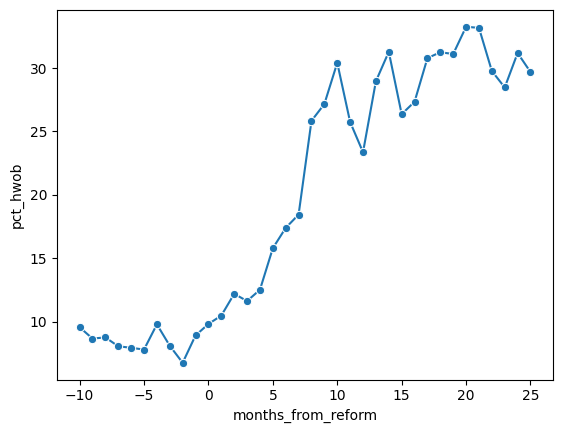

In [2]:
# SOLUTION
# Filter to just Baltimore City
baltimore_data = df[df['county'] == 'Baltimore City']

# Create line plot showing cash bail (HWOB) over time
sns.lineplot(data=baltimore_data,
             x='months_from_reform',
             y='pct_hwob',
             marker='o')

print("\nInterpretation: We can clearly see cash bail usage dropped dramatically")
print("after reform (month 0) in Baltimore City.")

## Exercise 2: Grouped Line Plot - SOLUTION

**Task:** Create a line plot comparing `pct_hdob` (detention rates) over time for large vs small counties.

<Axes: xlabel='months_from_reform', ylabel='pct_hdob'>


Interpretation: Large counties (True) and small counties (False)
both show similar patterns - detention rates increased slightly after reform.


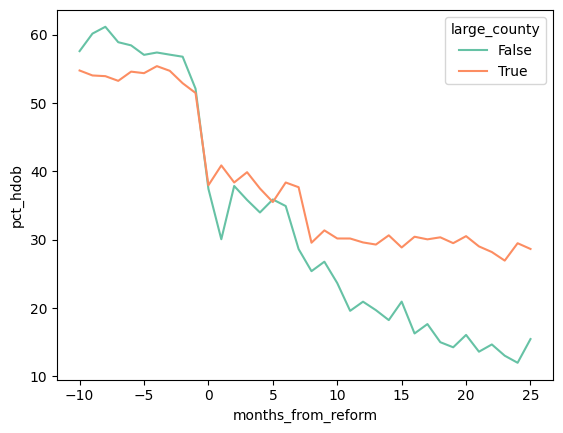

In [3]:
# SOLUTION
# Use the large_county column we created earlier
sns.lineplot(data=df,
             x='months_from_reform',
             y='pct_hdob',
             hue='large_county',
             errorbar=None,
             palette='Set2')

print("\nInterpretation: Large counties (True) and small counties (False)")
print("both show similar patterns - detention rates increased slightly after reform.")

## Exercise 3: Bar Chart Comparison - SOLUTION

**Task:** Create a bar chart comparing average `pct_hdob` (detention) across the top 5 largest counties.

/tmp/ipykernel_4044680/3593087373.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_counties,


<Axes: xlabel='county', ylabel='pct_hdob'>


Interpretation: This shows the average detention rate for each of the
5 largest counties, aggregated across all time periods.


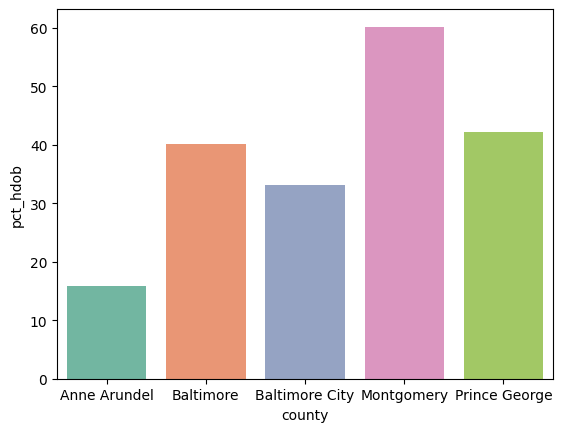

In [4]:
# SOLUTION
# Filter to just the top 5 largest counties
top5_counties = df[df['county'].isin(['Baltimore City', 'Prince George', 
                                       'Baltimore', 'Anne Arundel', 'Montgomery'])]

# Create bar chart comparing detention rates
sns.barplot(data=top5_counties,
            x='county',
            y='pct_hdob',
            errorbar=None,
            palette='Set2')

print("\nInterpretation: This shows the average detention rate for each of the")
print("5 largest counties, aggregated across all time periods.")

## Exercise 4: Histogram Exploration - SOLUTION

**Task:** Create a histogram of `pct_hwob` with 15 bins.

<Axes: xlabel='pct_hwob', ylabel='Count'>


Interpretation: The distribution shows many county-months had very low
cash bail usage (near 0%), likely after the reform. There's also a cluster
of higher usage rates, probably from before the reform.


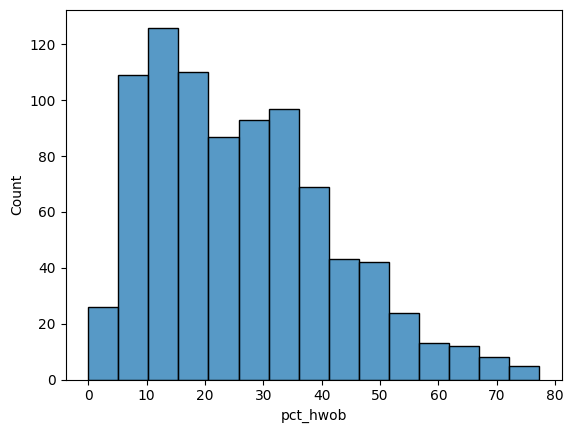

In [5]:
# SOLUTION
# Create histogram of cash bail percentages
sns.histplot(data=df,
             x='pct_hwob',
             bins=15)

print("\nInterpretation: The distribution shows many county-months had very low")
print("cash bail usage (near 0%), likely after the reform. There's also a cluster")
print("of higher usage rates, probably from before the reform.")

## Exercise 5: Histogram Comparison - SOLUTION

**Task:** Create a histogram comparing the distribution of `pct_hwob` before and after reform.

In [ ]:
# SOLUTION
# Compare distributions before and after reform
sns.histplot(data=df,
             x='pct_hwob',
             hue='post_reform',
             bins=15,
             stat='density',
             palette='Set2')

print("\nInterpretation: Before reform (False), cash bail usage was spread across")
print("a wide range. After reform (True), usage became concentrated near 0%,")
print("showing the reform successfully reduced cash bail. The distribution became")
print("LESS variable after reform - more concentrated around low values.")

## Exercise 6: Scatter Plot - SOLUTION

**Task:** Create a scatter plot showing the relationship between `pct_ror` and `pct_hwob`.

In [ ]:
# SOLUTION
# Create scatter plot of ROR vs cash bail
sns.scatterplot(data=df,
                x='pct_ror',
                y='pct_hwob',
                alpha=0.5)

print("\nInterpretation: There appears to be a NEGATIVE relationship - as ROR")
print("(release) rates increase, cash bail rates tend to decrease. This makes")
print("sense: judges have limited options, so using more of one means less of another.")

## Exercise 7: Advanced Scatter Plot - SOLUTION

**Task:** Create a scatter plot of `pct_ror` vs `pct_hwob` with `hue='post_reform'`.

In [ ]:
# SOLUTION
# Scatter plot colored by reform period
sns.scatterplot(data=df,
                x='pct_ror',
                y='pct_hwob',
                hue='post_reform',
                alpha=0.5,
                palette='Set2')

print("\nInterpretation: Before reform (False), points are spread across higher")
print("cash bail values. After reform (True), points cluster in the lower region")
print("showing less cash bail usage, regardless of ROR rate.")

In [ ]:
# SOLUTION - Adding separate regression lines
# This is a bit advanced! We create two separate regplots, one for each period

# Filter data by period
pre_reform = df[df['post_reform'] == False]
post_reform = df[df['post_reform'] == True]

# Plot regression lines for each period
sns.regplot(data=pre_reform,
            x='pct_ror',
            y='pct_hwob',
            scatter=True,
            label='Pre-reform',
            color='blue',
            scatter_kws={'alpha': 0.3})

sns.regplot(data=post_reform,
            x='pct_ror',
            y='pct_hwob',
            scatter=True,
            label='Post-reform',
            color='orange',
            scatter_kws={'alpha': 0.3})

print("\nInterpretation: The regression lines show the negative relationship")
print("exists in both periods, but the post-reform line is lower (less cash bail)")
print("across all ROR levels.")

## Exercise 8: Scatter Plot II - SOLUTION

**Task:** Create a scatter plot of `month` vs `n_total_hearings` with `hue='year'`.

In [ ]:
# SOLUTION
# First, convert year to string so seaborn treats it as categorical
df['year_str'] = df['year'].astype(str)

# Create scatter plot
sns.scatterplot(data=df,
                x='month',
                y='n_total_hearings',
                hue='year_str',
                alpha=0.6,
                palette='Set2')

print("\nInterpretation: There's a clear SEASONAL PATTERN! Total hearings tend to")
print("be lower in certain months (likely summer months) and higher in others.")
print("This pattern repeats across years, shown by the vertical clustering of different")
print("colored points at similar months.")

## Summary

These exercises demonstrated:

1. **Line plots** show trends over time (Exercises 1-2)
2. **Bar charts** compare categories (Exercise 3)
3. **Histograms** reveal distributions (Exercises 4-5)
4. **Scatter plots** explore relationships between variables (Exercises 6-8)

### Key Seaborn Principles:

- Always specify `data=`, `x=`, and `y=` parameters
- Use `hue=` to add grouping by color
- Use `palette='Set2'` or `'colorblind'` for nice colors
- Use `alpha=0.5` to make overlapping points visible
- Use `errorbar=None` to turn off confidence intervals
- Filter your data BEFORE plotting to focus on specific subsets

### Remember:

- Seaborn makes visualization simple - you don't need matplotlib for basic plots
- Always interpret your visualizations - what story do they tell?
- Pandas preparation (filtering, grouping) often comes before visualization
- Different plot types answer different questions - choose wisely!